### 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

**Creating data to view and fit**

In [36]:
import tensorflow as tf 
import tensorflow_datasets as tfds


import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

X , y  = make_regression(n_samples = 200 , 
                               n_features = 10 , 
                               n_targets = 1)

X.shape , y.shape

((200, 10), (200,))

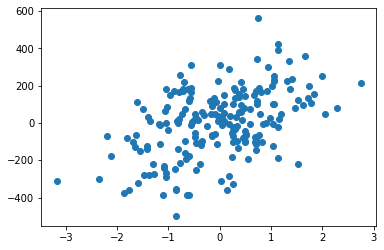

In [37]:
# Let's visualize the dataset 

plt.scatter(X[:, 0] , y)

**Create a model**

In [38]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 142.2018 - mae: 142.2018
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 142.2022 - mae: 142.2022
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 142.2034 - mae: 142.2034
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 142.1988 - mae: 142.1988
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 142.1997 - mae: 142.1997
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 142.2030 - mae: 142.2030
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 142.2043 - mae: 142.2044
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 142.2042 - mae: 142.2042
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 142.1986 - mae: 142.1987
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 142.2026 - mae: 142.2026


### 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 142.2123 - mae: 142.2123
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 142.2099 - mae: 142.2099
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 142.2057 - mae: 142.2057
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 142.2067 - mae: 142.2066
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 142.2033 - mae: 142.2033
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 142.1996 - mae: 142.1996
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 142.1975 - mae: 142.1975
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 142.1953 - mae: 142.1953
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 142.1952 - mae: 142.1952
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 142.1912 - mae: 142.1912


This model doesn't improved.

let's split this into train and test set to help our model to generalize well.


In [40]:
# Splitting the data into train and test splits 
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 )

# Checking the shapes of our splitted data 
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [41]:
# Let's build the model from scratch 
tf.random.set_seed(42)

# Model 1 with one layer and fewer units 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model_1.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model only our training data 
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 142.7429 - mae: 142.7429
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 142.7417 - mae: 142.7417
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 142.7413 - mae: 142.7413
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 142.7359 - mae: 142.7359
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 142.7384 - mae: 142.7384
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 142.7433 - mae: 142.7433
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 142.7400 - mae: 142.7401
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 142.7406 - mae: 142.7406
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 142.7410 - mae: 142.7410
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 142.7425 - mae: 142.7425
Epoch 11/100
5/5 [=====================

In [42]:
#Evaluating our model on the test data (unseen data)
model_1.evaluate(X_test , y_test)

2/2 [==============================] - 0s 6ms/step - loss: 140.0325 - mae: 140.0325


[140.03250122070312, 140.03250122070312]

In [43]:
# Getting the predictions of our model 
y_preds_1 = model_1.predict(X_test)
y_preds_1

array([[ 0.37958798],
       [ 0.75821006],
       [-0.5701614 ],
       [ 1.5458738 ],
       [ 0.36755115],
       [-0.659906  ],
       [-0.24612282],
       [ 2.8313565 ],
       [-0.3693346 ],
       [-1.3457515 ],
       [ 0.91944677],
       [-0.9748234 ],
       [-0.27275443],
       [ 0.631024  ],
       [ 0.23613358],
       [ 0.04487387],
       [-0.16672835],
       [-0.06815756],
       [-0.04911153],
       [ 0.6265935 ],
       [ 1.0765767 ],
       [-0.13048102],
       [ 1.3294482 ],
       [-0.90028393],
       [ 1.4825867 ],
       [ 0.15586919],
       [-2.0046449 ],
       [ 0.5205021 ],
       [ 0.39814252],
       [-1.5944299 ],
       [ 1.2494193 ],
       [-0.52716786],
       [ 0.22069144],
       [ 0.07792115],
       [-2.8816652 ],
       [-0.89855844],
       [ 1.5774387 ],
       [-0.70473164],
       [-0.31818914],
       [ 0.10133921]], dtype=float32)

In [44]:
def plot_predictions(train_data,
                     train_labels, 
                     test_data,
                     test_labels, 
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

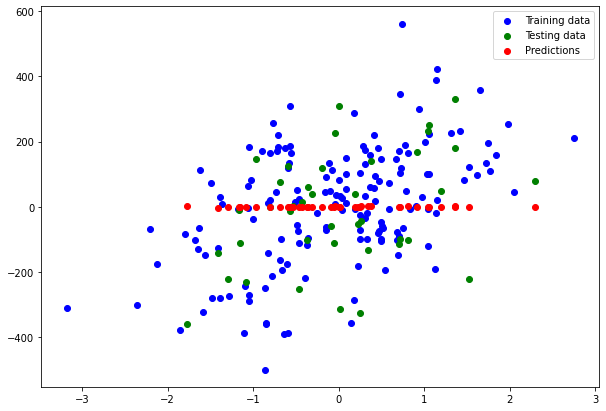

In [45]:
# Plotting our predictions with our target 
plot_predictions(X_train[:,0] , y_train ,  
                 X_test[:,0] , y_test , y_preds_1)

 Our model is trying to predict the points but it's not doing a great job with it. Let's try couple of experiments and see how it goes.

**model_2: Building a model with 2 layers and fewer units**

In [46]:
tf.random.set_seed(42)

# 1. Build the model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10) ,
  tf.keras.layers.Dense(10), 
])

# 2. Compile the model 
model_2.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# 3. Fit the model 
model_2.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 142.6318 - mae: 142.6318
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 142.6158 - mae: 142.6158
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 142.6003 - mae: 142.6003
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 142.5833 - mae: 142.5833
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 142.5666 - mae: 142.5666
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 142.5492 - mae: 142.5492
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 142.5312 - mae: 142.5312
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 142.5129 - mae: 142.5129
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 142.4932 - mae: 142.4932
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 142.4725 - mae: 142.4725
Epoch 11/100
5/5 [=====================

**model_3: Building our model with 3 layers and with more hidden units**

In [47]:
tf.random.set_seed(42)

# Creating the model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(50), 
  tf.keras.layers.Dense(1) # Should be always one 
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_3.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 142.3548 - mae: 142.3548
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 141.8294 - mae: 141.8294
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 141.2919 - mae: 141.2919
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 140.6632 - mae: 140.6632
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 139.9702 - mae: 139.9702
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 139.1263 - mae: 139.1263
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 138.1347 - mae: 138.1347
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 136.9898 - mae: 136.9898
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 135.4991 - mae: 135.4991
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 133.7520 - mae: 133.7520
Epoch 11/100
5/5 [=====================

In [48]:
#Evaluate moodel_3 with data that it nvr seen
model_3.evaluate(X_test , y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3484 - mae: 0.3484


[0.34843918681144714, 0.34843918681144714]

Awesome! This is what we want error should be loss. Let's plot our predictions with targets!

In [49]:
# Making predictions 
y_preds_3 = model_3.predict(X_test)
y_preds_3.shape

(40, 1)

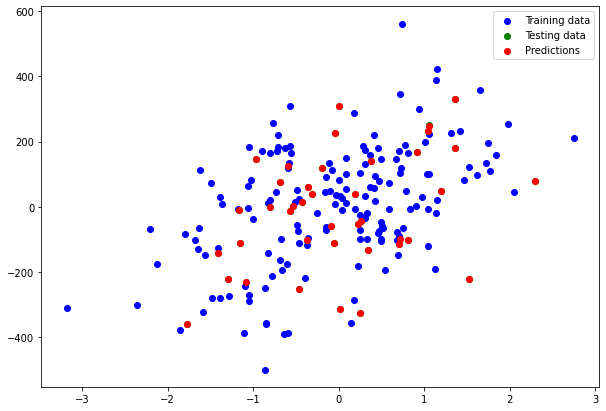

In [50]:
plot_predictions(X_train[: , 0] , y_train , 
                 X_test[: , 0] , y_test , 
                 y_preds_3)

This model has predicted every test data correctly. 

Can't spot a green dot (test data) it's because our predictions (red dot) overlapped.

This model is doing a perfect job!

### 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:

1. Building a larger model (how does one with 4 dense layers go?).
2. Increasing the number of units in each layer.
3. Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
4. What happens if you train for longer (say 300 epochs instead of 200)?


**1. Building a larger model (how does one with 4 dense layers go?).**

In [3]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#One Hot Encoding pandas dataframe so they all become numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
# Create X & y values (features and labels) --Splitting into X and Y 
X = insurance_one_hot.drop("charges", axis=1)  #feature matrix
y = insurance_one_hot["charges"] #label vector

X.shape , y.shape

((1338, 11), (1338,))

In [52]:
# Create training and test set --> use feature matrix and label vector
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible 
#Split train =80%, test = 20%
#en(X), len(X_train), len(X_test)

# Checking the shapes
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

**2. Increasing the number of units in each layer.**

In [64]:
tf.random.set_seed(42)

# 1. Create a model with 4 dense layers and more units
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50) ,
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# 3. Fit the model
insurance_model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 9ms/step - loss: 12907.1611 - mae: 12907.1611
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 12179.2549 - mae: 12179.2549
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 11955.6572 - mae: 11955.6572
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 10579.5078 - mae: 10579.5078
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 8336.3320 - mae: 8336.3320
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 8326.3887 - mae: 8326.3887
Epoch 7/100
34/34 [==============================] - 0s 9ms/step - loss: 8313.6396 - mae: 8313.6396
Epoch 8/100
34/34 [==============================] - 0s 9ms/step - loss: 8342.3027 - mae: 8342.3027
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 8307.5059 - mae: 8307.5059
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 8312.4336 - mae: 8312.4336
Epo

**3. Increasing Adam first parameters to 10x**

lr= 0.001
Epoch 100/100
34/34 [==============================] - 0s 9ms/step - loss: 8302.4883 - mae: 8302.4883

Epoch 300/300
34/34 [==============================] - 0s 7ms/step - loss: 8324.9492 - mae: 8324.9492

In [67]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100) ,
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001*10),
              metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 6ms/step - loss: 11889.2432 - mae: 11889.2432
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 8504.3818 - mae: 8504.3818
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 8445.4238 - mae: 8445.4238
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 8410.1797 - mae: 8410.1797
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 8337.0703 - mae: 8337.0703
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 8407.7285 - mae: 8407.7285
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 8396.9160 - mae: 8396.9160
Epoch 8/300
34/34 [==============================] - 0s 5ms/step - loss: 8581.4365 - mae: 8581.4365
Epoch 9/300
34/34 [==============================] - 0s 6ms/step - loss: 8419.4238 - mae: 8419.4238
Epoch 10/300
34/34 [==============================] - 0s 6ms/step - loss: 8478.5439 - mae: 8478.54

**4. train for longer (say 300 epochs instead of 200) produces**

Epoch 300/300
34/34 [==============================] - 0s 6ms/step - loss: 8316.9912 - mae: 8316.9912

Epoch 400/400
34/34 [==============================] - 0s 6ms/step - loss: 8295.0449 - mae: 8295.0449

In [71]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001*10),
              metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=400)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 6ms/step - loss: 11889.2432 - mae: 11889.2432
Epoch 2/400
34/34 [==============================] - 0s 5ms/step - loss: 8504.3818 - mae: 8504.3818
Epoch 3/400
34/34 [==============================] - 0s 6ms/step - loss: 8445.4238 - mae: 8445.4238
Epoch 4/400
34/34 [==============================] - 0s 5ms/step - loss: 8410.1797 - mae: 8410.1797
Epoch 5/400
34/34 [==============================] - 0s 6ms/step - loss: 8337.0703 - mae: 8337.0703
Epoch 6/400
34/34 [==============================] - 0s 6ms/step - loss: 8407.7285 - mae: 8407.7285
Epoch 7/400
34/34 [==============================] - 0s 6ms/step - loss: 8396.9160 - mae: 8396.9160
Epoch 8/400
34/34 [==============================] - 0s 6ms/step - loss: 8581.4365 - mae: 8581.4365
Epoch 9/400
34/34 [==============================] - 0s 5ms/step - loss: 8419.4238 - mae: 8419.4238
Epoch 10/400
34/34 [==============================] - 0s 6ms/step - loss: 8478.5439 - mae: 8478.5439
Epoch 11/

In [72]:
# Evaluate on test data 
insurance_model_3.evaluate(X_test , y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8594.8506 - mae: 8594.8506


[8594.8505859375, 8594.8505859375]

Text(0.5, 0, 'Epochs')

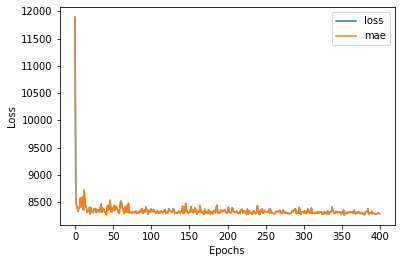

In [73]:
#Let's plot the loss curve Vs Epochs 
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

Seems even increasing the learning rate and the number of epochs, the model isn't performing at a greater level.

### 4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [74]:
# Getting the boston datasets from tensorflow datasets 

(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , 
                                                                           test_split = 0.2 , seed = 42)

65536/57026 [==================================] - 0s 0us/step


**This datasets is numpy array format and it's normalized.**

In [75]:
tf.random.set_seed(42)

# 1. Create a model
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])


# 3. Fit model
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 95.6416 - mae: 95.6416
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 15.5989 - mae: 15.5989
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 8.6769 - mae: 8.6769
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 7.5622 - mae: 7.5622
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 7.1922 - mae: 7.1922
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 6.3219 - mae: 6.3219
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 6.7137 - mae: 6.7137
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 6.3261 - mae: 6.3261
Epoch 9/300
13/13 [==============================] - 0s 8ms/step - loss: 7.6760 - mae: 7.6760
Epoch 10/300
13/13 [==============================] - 0s 8ms/step - loss: 8.2790 - mae: 8.2790
Epoch 11/300
13/13 [==============================] - 0

In [76]:
# Let's evaluate on the test data 
model.evaluate(X_test , y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.7630 - mae: 3.7630


[3.76304030418396, 3.76304030418396]

Text(0.5, 0, 'epochs')

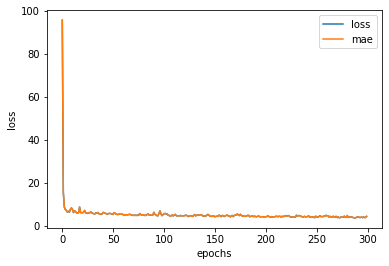

In [77]:
# Plotting the loss Vs Epoch 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')